In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error,r2_score

In [42]:
df=pd.read_csv("C:/Users/ADMIN/Downloads/life_expectancy.csv")
df.head()

,Country,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
0,Afghanistan,2015,Developing,33736494.0,65.0,1154,6.0,65.0,0.1,62,83,8.16,584.259210,19.1,17.2,0.01,10.1,65.0
1,Afghanistan,2014,Developing,327582.0,62.0,492,58.0,62.0,0.1,64,86,8.18,612.696514,18.6,17.5,0.01,10.0,59.9
2,Afghanistan,2013,Developing,31731688.0,64.0,430,62.0,64.0,0.1,66,89,8.13,631.744976,18.1,17.7,0.01,9.9,59.9
3,Afghanistan,2012,Developing,3696958.0,67.0,2787,67.0,67.0,0.1,69,93,8.52,669.959000,17.6,17.9,0.01,9.8,59.5
4,Afghanistan,2011,Developing,2978599.0,68.0,3013,68.0,68.0,0.1,71,97,7.87,63.537231,17.2,18.2,0.01,9.5,59.2


In [43]:
df.tail()

,Country,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
2843,Zimbabwe,2004,Developing,12777511.0,68.0,31,67.0,65.0,33.6,27,42,7.13,454.366654,27.1,9.4,4.36,9.2,44.3
2844,Zimbabwe,2003,Developing,12633897.0,7.0,998,7.0,68.0,36.7,26,41,6.52,453.351155,26.7,9.8,4.06,9.5,44.5
2845,Zimbabwe,2002,Developing,125525.0,73.0,304,73.0,71.0,39.8,25,40,6.53,57.348340,26.3,1.2,4.43,10.0,44.8
2846,Zimbabwe,2001,Developing,12366165.0,76.0,529,76.0,75.0,42.1,25,39,6.16,548.587312,25.9,1.6,1.72,9.8,45.3
2847,Zimbabwe,2000,Developing,12222251.0,79.0,1483,78.0,78.0,43.5,24,39,7.10,547.358878,25.5,11.0,1.68,9.8,46.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               2848 non-null   object 
 1   Year                  2848 non-null   int64  
 2   Status                2848 non-null   object 
 3   Population            2204 non-null   float64
 4   Hepatitis B           2306 non-null   float64
 5   Measles               2848 non-null   int64  
 6   Polio                 2829 non-null   float64
 7   Diphtheria            2829 non-null   float64
 8   HIV/AIDS              2848 non-null   float64
 9   infant deaths         2848 non-null   int64  
 10  under-five deaths     2848 non-null   int64  
 11  Total expenditure     2627 non-null   float64
 12  GDP                   2406 non-null   float64
 13  BMI                   2816 non-null   float64
 14  thinness  1-19 years  2816 non-null   float64
 15  Alcohol              

In [45]:
df.columns

Index(['Country', 'Year', 'Status', 'Population', 'Hepatitis B', 'Measles',
       'Polio', 'Diphtheria', 'HIV/AIDS', 'infant deaths', 'under-five deaths',
       'Total expenditure', 'GDP', 'BMI', 'thinness  1-19 years', 'Alcohol',
       'Schooling', 'Life expectancy'],
      dtype='object')

In [46]:
df.shape

(2848, 18)

In [47]:
df.corr()

,Year,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
Year,1.000000,0.016996,0.100585,-0.083160,0.094647,0.128703,-0.137193,-0.031105,-0.036478,0.087076,0.102521,0.106649,-0.039319,-0.049223,0.208911,0.169144
Population,0.016996,1.000000,-0.124750,0.323543,-0.032998,-0.024220,-0.029245,0.568906,0.553922,-0.078426,-0.028052,-0.070635,0.254817,-0.032587,-0.028594,-0.019353
Hepatitis B,0.100585,-0.124750,1.000000,-0.147957,0.484224,0.610164,-0.115024,-0.224604,-0.233360,0.069698,0.082088,0.155585,-0.127751,0.077390,0.214297,0.256613
Measles,-0.083160,0.323543,-0.147957,1.000000,-0.169115,-0.174630,0.045853,0.493982,0.512826,-0.104606,-0.073078,-0.174793,0.258161,-0.051190,-0.151299,-0.198178
Polio,0.094647,-0.032998,0.484224,-0.169115,1.000000,0.672972,-0.159482,-0.172132,-0.188249,0.143162,0.210771,0.287940,-0.226663,0.213613,0.410212,0.464366
Diphtheria,0.128703,-0.024220,0.610164,-0.174630,0.672972,1.000000,-0.162677,-0.173307,-0.191175,0.156599,0.199547,0.284376,-0.225360,0.214813,0.414368,0.476795
HIV/AIDS,-0.137193,-0.029245,-0.115024,0.045853,-0.159482,-0.162677,1.000000,0.027153,0.039157,-0.000319,-0.137283,-0.244487,0.200556,-0.049072,-0.220601,-0.559105
infant deaths,-0.031105,0.568906,-0.224604,0.493982,-0.172132,-0.173307,0.027153,1.000000,0.996948,-0.122950,-0.102310,-0.214691,0.471186,-0.110582,-0.186106,-0.201055
under-five deaths,-0.036478,0.553922,-0.233360,0.512826,-0.188249,-0.191175,0.039157,0.996948,1.000000,-0.124488,-0.105913,-0.224972,0.470691,-0.106273,-0.200276,-0.224903
Total expenditure,0.087076,-0.078426,0.069698,-0.104606,0.143162,0.156599,-0.000319,-0.122950,-0.124488,1.000000,0.141139,0.241852,-0.279021,0.304126,0.266692,0.222788


<AxesSubplot:>

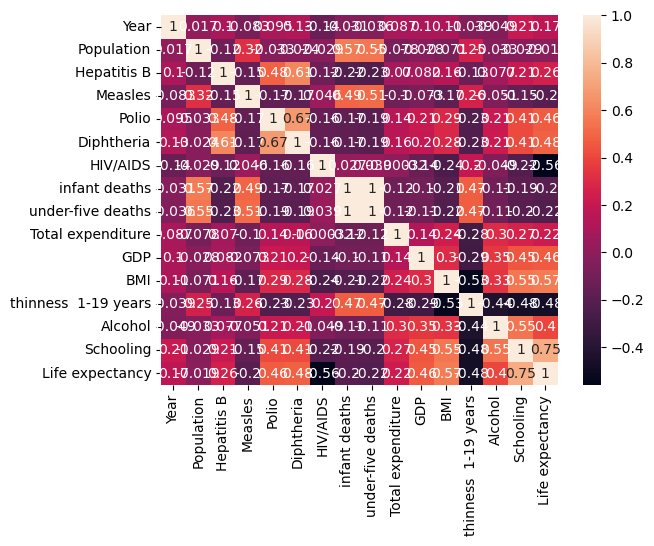

In [48]:
sns.heatmap(df.corr(),annot=True)

In [49]:
#FINDING NULL VALUES

In [50]:
df.isnull().sum()

Country                   0
Year                      0
Status                    0
Population              644
Hepatitis B             542
Measles                   0
Polio                    19
Diphtheria               19
HIV/AIDS                  0
infant deaths             0
under-five deaths         0
Total expenditure       221
GDP                     442
BMI                      32
thinness  1-19 years     32
Alcohol                 188
Schooling               160
Life expectancy           0
dtype: int64

In [51]:
df.dtypes

Country                  object
Year                      int64
Status                   object
Population              float64
Hepatitis B             float64
Measles                   int64
Polio                   float64
Diphtheria              float64
HIV/AIDS                float64
infant deaths             int64
under-five deaths         int64
Total expenditure       float64
GDP                     float64
BMI                     float64
thinness  1-19 years    float64
Alcohol                 float64
Schooling               float64
Life expectancy         float64
dtype: object

array([[<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Hepatitis B'}>,
        <AxesSubplot:title={'center':'Polio'}>],
       [<AxesSubplot:title={'center':'Diphtheria'}>,
        <AxesSubplot:title={'center':'HIV/AIDS'}>,
        <AxesSubplot:title={'center':'Total expenditure'}>],
       [<AxesSubplot:title={'center':'GDP'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'thinness  1-19 years'}>],
       [<AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'Schooling'}>,
        <AxesSubplot:title={'center':'Life expectancy'}>]], dtype=object)

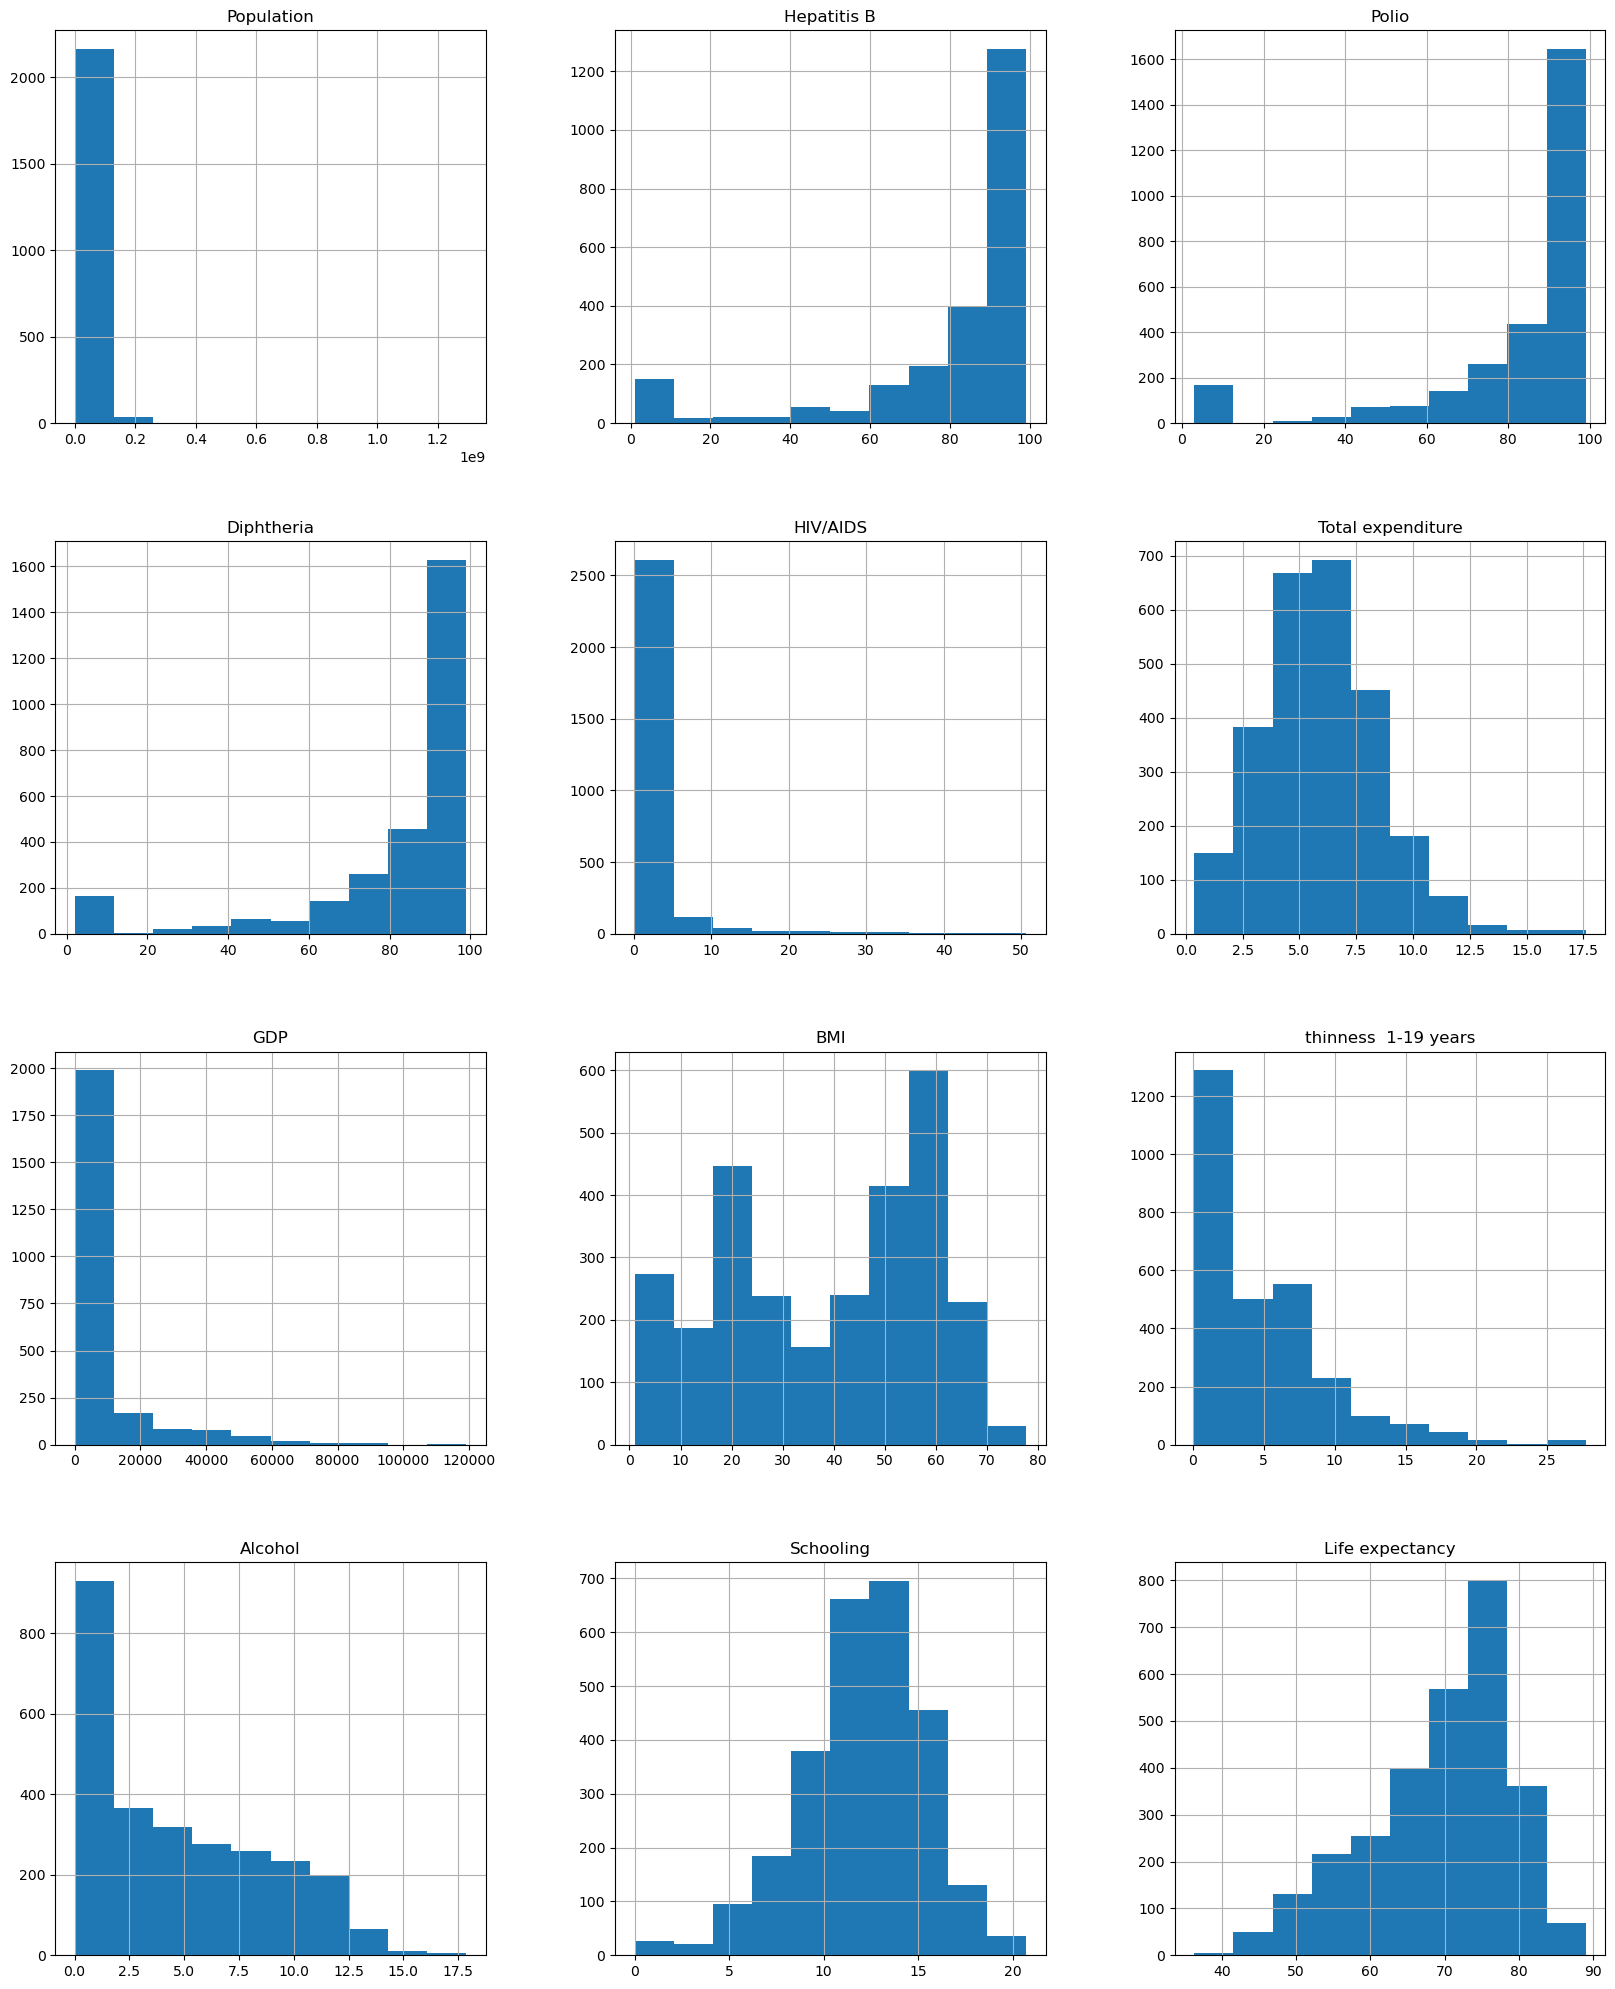

In [52]:
graph=df.select_dtypes(['float'])
graph.hist(figsize=(20,25))

In [53]:
for i in['Population','Hepatitis B','Polio','Diphtheria','Total expenditure','GDP','BMI','thinness  1-19 years','Alcohol','Schooling']:
    df[i]=df[i].fillna(df[i].median())
    

In [54]:
df.isnull().mean()*100

Country                 0.0
Year                    0.0
Status                  0.0
Population              0.0
Hepatitis B             0.0
Measles                 0.0
Polio                   0.0
Diphtheria              0.0
HIV/AIDS                0.0
infant deaths           0.0
under-five deaths       0.0
Total expenditure       0.0
GDP                     0.0
BMI                     0.0
thinness  1-19 years    0.0
Alcohol                 0.0
Schooling               0.0
Life expectancy         0.0
dtype: float64

In [55]:
#ENCODING

In [56]:
df.nunique()

Country                  178
Year                      16
Status                     2
Population              2199
Hepatitis B               87
Measles                  917
Polio                     73
Diphtheria                80
HIV/AIDS                 200
infant deaths            183
under-five deaths        227
Total expenditure        814
GDP                     2407
BMI                      602
thinness  1-19 years     200
Alcohol                 1059
Schooling                173
Life expectancy          362
dtype: int64

In [57]:
df.dtypes

Country                  object
Year                      int64
Status                   object
Population              float64
Hepatitis B             float64
Measles                   int64
Polio                   float64
Diphtheria              float64
HIV/AIDS                float64
infant deaths             int64
under-five deaths         int64
Total expenditure       float64
GDP                     float64
BMI                     float64
thinness  1-19 years    float64
Alcohol                 float64
Schooling               float64
Life expectancy         float64
dtype: object

In [58]:
#LABEL ENCODING

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
lab=LabelEncoder()
df['Country']=lab.fit_transform(df['Country'])
df.sample(10)

,Country,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
2202,137,2005,Developing,82858.0,99.0,0,99.0,99.0,0.1,0,0,3.91,1192.517400,3.1,6.0,7.820,12.1,72.2
1617,101,2014,Developing,1242216.0,84.0,3,87.0,87.0,0.1,31,36,6.30,1452.277660,62.8,1.6,5.260,13.1,76.6
915,57,2012,Developing,1391756.5,98.0,0,98.0,98.0,1.4,3,5,6.12,1841.086830,25.4,7.8,0.010,8.8,62.0
1840,115,2015,Developed,518867.0,92.0,14,95.0,95.0,0.1,0,0,5.76,7455.246540,61.2,0.8,5.970,17.7,81.8
1773,110,2002,Developed,16148929.0,92.0,3,97.0,97.0,0.1,1,1,8.34,28817.323210,53.4,1.1,9.680,16.9,78.4
685,42,2002,Developing,1391756.5,92.0,0,99.0,64.0,0.1,14,18,5.76,1841.086830,26.2,5.9,3.080,12.4,67.6
1890,118,2013,Developing,3838462.0,8.0,0,81.0,8.0,0.1,1,1,8.90,11685.979830,56.3,1.9,6.890,12.9,77.5
1504,94,2015,Developing,1757367.0,88.0,0,88.0,88.0,4.8,26,38,5.76,362.657544,19.6,6.4,3.785,10.8,58.3
2031,126,2000,Developing,1391756.5,92.0,687,97.0,95.0,0.1,1,2,6.65,1841.086830,46.5,3.6,9.890,12.4,67.1
1974,123,2009,Developed,1568247.0,96.0,3,96.0,96.0,0.1,0,0,1.42,2363.971610,57.3,0.7,12.030,16.0,79.3


In [61]:
#ONE HOT ENCODING

In [62]:
df1=pd.get_dummies(df)
df1

,Country,Year,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy,Status_Developed,Status_Developing
0,0,2015,33736494.0,65.0,1154,6.0,65.0,0.1,62,83,8.16,584.259210,19.1,17.2,0.01,10.1,65.0,0,1
1,0,2014,327582.0,62.0,492,58.0,62.0,0.1,64,86,8.18,612.696514,18.6,17.5,0.01,10.0,59.9,0,1
2,0,2013,31731688.0,64.0,430,62.0,64.0,0.1,66,89,8.13,631.744976,18.1,17.7,0.01,9.9,59.9,0,1
3,0,2012,3696958.0,67.0,2787,67.0,67.0,0.1,69,93,8.52,669.959000,17.6,17.9,0.01,9.8,59.5,0,1
4,0,2011,2978599.0,68.0,3013,68.0,68.0,0.1,71,97,7.87,63.537231,17.2,18.2,0.01,9.5,59.2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,177,2004,12777511.0,68.0,31,67.0,65.0,33.6,27,42,7.13,454.366654,27.1,9.4,4.36,9.2,44.3,0,1
2844,177,2003,12633897.0,7.0,998,7.0,68.0,36.7,26,41,6.52,453.351155,26.7,9.8,4.06,9.5,44.5,0,1
2845,177,2002,125525.0,73.0,304,73.0,71.0,39.8,25,40,6.53,57.348340,26.3,1.2,4.43,10.0,44.8,0,1
2846,177,2001,12366165.0,76.0,529,76.0,75.0,42.1,25,39,6.16,548.587312,25.9,1.6,1.72,9.8,45.3,0,1


In [63]:
df.describe()

,Country,Year,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
count,2848.000000,2848.000000,2.848000e+03,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000
mean,88.500000,2007.500000,1.024708e+07,83.155548,2083.082163,82.751053,82.521770,1.756461,28.359902,39.500000,5.921952,6760.640422,38.564010,4.829846,4.582563,12.079249,69.347402
std,51.392386,4.610582,5.471426e+07,22.916796,10249.107207,23.371727,23.630354,5.148935,117.188032,159.800866,2.405730,13462.171471,19.851174,4.421661,3.933944,3.226465,9.528332
min,0.000000,2000.000000,3.400000e+01,1.000000,0.000000,3.000000,2.000000,0.100000,0.000000,0.000000,0.370000,1.681350,1.000000,0.100000,0.010000,0.000000,36.300000
25%,44.000000,2003.750000,4.283075e+05,83.000000,0.000000,78.000000,79.000000,0.100000,0.000000,0.000000,4.340000,615.809250,19.600000,1.600000,1.137500,10.400000,63.500000
50%,88.500000,2007.500000,1.391756e+06,92.000000,16.000000,93.000000,93.000000,0.100000,3.000000,4.000000,5.760000,1841.086830,43.900000,3.300000,3.785000,12.400000,72.200000
75%,133.000000,2011.250000,4.515401e+06,96.000000,336.750000,97.000000,97.000000,0.700000,20.000000,25.000000,7.370000,4863.486708,56.100000,7.100000,7.467500,14.125000,75.800000
max,177.000000,2015.000000,1.293859e+09,99.000000,212183.000000,99.000000,99.000000,50.600000,1800.000000,2500.000000,17.600000,119172.741800,77.600000,27.700000,17.870000,20.700000,89.000000


In [64]:
#CHOOSING X AND Y

In [65]:
y=df1['Life expectancy']
x=df1.drop(['Life expectancy'],axis=1)
print(y)
print(x)

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2843    44.3
2844    44.5
2845    44.8
2846    45.3
2847    46.0
Name: Life expectancy, Length: 2848, dtype: float64
      Country  Year  Population  Hepatitis B  Measles  Polio  Diphtheria  \
0           0  2015  33736494.0         65.0     1154    6.0        65.0   
1           0  2014    327582.0         62.0      492   58.0        62.0   
2           0  2013  31731688.0         64.0      430   62.0        64.0   
3           0  2012   3696958.0         67.0     2787   67.0        67.0   
4           0  2011   2978599.0         68.0     3013   68.0        68.0   
...       ...   ...         ...          ...      ...    ...         ...   
2843      177  2004  12777511.0         68.0       31   67.0        65.0   
2844      177  2003  12633897.0          7.0      998    7.0        68.0   
2845      177  2002    125525.0         73.0      304   73.0        71.0   
2846      177  2001  12366165.0         76.0 

# train and test

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=42)
print(xtrain)
print(xtest)
print(ytrain)
print(ytest)

      Country  Year  Population  Hepatitis B  Measles  Polio  Diphtheria  \
942        58  2001     43864.0         61.0       35   83.0        87.0   
598        36  2009   4488263.0         87.0        0    8.0        86.0   
2674      167  2013   1391756.5         92.0     1919   95.0        95.0   
2210      138  2013    692279.0         92.0       15   92.0        92.0   
789        49  2010   6164626.0         89.0        0   89.0        89.0   
...       ...   ...         ...          ...      ...    ...         ...   
1638      102  2009   1391756.5         89.0        0   81.0        91.0   
1095       68  2008   7872658.0         92.0        0   93.0        93.0   
1130       70  2005    296734.0         92.0        0   95.0        95.0   
1294       80  2001   5193482.0         97.0       61   97.0        99.0   
860        53  2003    816628.0         99.0      305   95.0        94.0   

      HIV/AIDS  infant deaths  under-five deaths  Total expenditure  \
942        0.1  

# linear regression

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
lr=LinearRegression()
model_lr=lr.fit(xtrain,ytrain)
lr_pred=model_lr.predict(xtest)
lr_pred

array([77.62603296, 72.45358353, 70.22612546, 68.30150427, 56.5969503 ,
       58.65865508, 75.91310107, 78.9973658 , 70.35749119, 65.23464362,
       72.79492784, 75.16789334, 60.7465105 , 68.86904619, 71.88310424,
       77.14518284, 60.69821832, 69.45918113, 77.69450443, 61.53504827,
       65.15173109, 75.74136624, 73.16527164, 69.95958927, 70.15085067,
       68.64707736, 81.69442918, 71.47879954, 84.00122631, 68.89475284,
       84.81399927, 77.52510622, 71.36556404, 30.98924921, 76.24103598,
       75.24864139, 71.84468719, 65.39084544, 79.44961055, 64.37187499,
       79.50627402, 68.70383942, 69.90764745, 75.45088086, 65.29385094,
       60.07709108, 68.9090071 , 82.78878508, 53.95623946, 66.31183229,
       73.17279598, 68.64842492, 50.26755481, 78.26729578, 78.68613384,
       59.20847593, 70.08730398, 71.73744642, 73.69014385, 49.89162452,
       63.10396595, 82.26742577, 75.18995063, 86.06965853, 75.32172575,
       76.87384621, 81.56178169, 72.67133254, 75.55278017, 71.13

In [70]:
print(mean_squared_error(lr_pred,ytest))
print(r2_score(lr_pred,ytest))

19.111368032746146
0.7375065544048016


# decision tree regression

In [71]:
from sklearn.tree import DecisionTreeRegressor

In [72]:
dt=DecisionTreeRegressor(random_state=42)
model_dt=dt.fit(xtrain,ytrain)
dt_pred=model_dt.predict(xtest)
dt_pred

array([80. , 75.7, 71.6, 66.6, 57.9, 59.3, 77.1, 73.4, 62.6, 69.9, 73.9,
       73.5, 64. , 72.6, 69.2, 74.2, 52.3, 64.4, 81.6, 55.3, 65.4, 74.4,
       75. , 68.8, 75.6, 69.3, 78.7, 77. , 81.7, 71.6, 79.6, 82.8, 72.5,
       46. , 73. , 72.9, 72.6, 64.4, 81.6, 67.4, 78.4, 71. , 72.7, 68.4,
       61.8, 65.6, 65.9, 81.1, 56.8, 66.3, 74.6, 71. , 56.5, 82. , 72.9,
       54.1, 64.5, 72.5, 77.5, 45.7, 56.7, 85. , 75.3, 81.3, 71.3, 71.9,
       81. , 76.6, 79.3, 67.4, 54.1, 72.6, 57.9, 80. , 78.8, 74.6, 83. ,
       66.6, 54.3, 71. , 61.3, 48. , 72.7, 65.7, 72.1, 74.9, 64. , 66. ,
       81.7, 63.8, 65.6, 75.4, 44.5, 76.1, 63.5, 73.3, 74.6, 58. , 75.8,
       76.2, 64.1, 54.9, 66.8, 69.2, 74.6, 89. , 69.8, 75.8, 58. , 58.3,
       53.1, 44. , 78. , 58.1, 76.2, 67.2, 55.3, 75.7, 76. , 71.6, 67.3,
       79. , 64. , 68. , 59.2, 81.8, 73.1, 73. , 63.9, 73.4, 52.9, 72.4,
       78.6, 73.2, 80. , 54.4, 68.5, 77.6, 75.4, 82.1, 84. , 67.5, 77. ,
       66.8, 75. , 47.8, 52.1, 65.4, 64.3, 71.4, 62

In [73]:
print(r2_score(dt_pred,ytest))
print(mean_squared_error(dt_pred,ytest))

0.901916470326549
8.614754385964911


# SVR

In [74]:
from sklearn.svm import SVR

In [75]:
svr=SVR()
model_svr=svr.fit(xtrain,ytrain)
svr_pred=model_svr.predict(xtest)
svr_pred

array([72.53603663, 72.17078107, 72.52250272, 72.42053799, 72.4403418 ,
       71.42887936, 72.39977569, 72.53883113, 71.56002949, 64.99706173,
       70.89707076, 72.39964769, 72.39961006, 72.39961035, 72.3996103 ,
       72.52704925, 72.51119838, 71.73781445, 72.39312174, 71.99281984,
       72.52359949, 72.39965622, 72.54031526, 71.7832881 , 70.90135794,
       70.93055587, 71.68397343, 72.53603639, 71.12700512, 72.53805791,
       72.09317076, 71.08607967, 71.91375319, 72.53869836, 72.39961035,
       72.54053379, 71.39425306, 72.39961018, 71.65491307, 72.29603722,
       72.48821353, 72.39961035, 72.26895633, 71.28058872, 72.39959788,
       71.33505119, 72.46313999, 72.39962246, 71.19624283, 72.46472733,
       72.15885679, 72.39961035, 72.33977828, 72.52794863, 72.4261284 ,
       72.39960671, 72.39961035, 72.39961032, 72.53583498, 72.42218895,
       72.38501746, 71.15998808, 72.47789257, 72.05483223, 72.39959539,
       72.39963331, 71.80038518, 72.39961739, 71.14130831, 72.28

In [76]:
print(r2_score(svr_pred,ytest))
print(mean_squared_error(svr_pred,ytest))

-139.70742383364316
98.17351026289643


# random forest

In [77]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
rf=RandomForestRegressor(random_state=42)
model_rf=rf.fit(xtrain,ytrain)
rf_pred=model_rf.predict(xtest)
rf_pred

array([79.813, 75.747, 72.304, 68.658, 59.162, 54.873, 75.166, 74.471,
       71.794, 71.521, 72.788, 72.665, 63.403, 72.519, 72.374, 73.847,
       54.138, 67.859, 83.791, 55.022, 65.461, 72.894, 74.602, 67.687,
       73.107, 70.96 , 81.085, 71.4  , 82.187, 72.193, 80.816, 82.367,
       72.059, 46.91 , 73.621, 72.862, 70.861, 64.901, 82.296, 64.909,
       78.67 , 70.746, 72.407, 69.592, 63.793, 62.67 , 67.44 , 82.935,
       49.614, 64.874, 74.811, 70.606, 54.805, 80.84 , 74.254, 52.85 ,
       69.459, 72.374, 77.778, 49.455, 61.457, 80.703, 75.352, 83.537,
       71.915, 75.403, 82.305, 75.338, 79.12 , 67.827, 52.119, 73.037,
       57.194, 81.956, 79.047, 74.891, 80.487, 65.917, 56.061, 70.361,
       68.468, 49.341, 72.445, 66.423, 72.819, 73.314, 63.968, 65.744,
       81.819, 65.488, 66.639, 75.29 , 46.291, 75.254, 70.173, 74.727,
       74.802, 53.929, 74.777, 75.671, 65.683, 53.782, 68.621, 70.484,
       73.39 , 83.082, 69.891, 76.358, 53.916, 57.21 , 53.646, 44.979,
      

In [79]:
print(r2_score(rf_pred,ytest))
print(mean_squared_error(rf_pred,ytest))

0.9547586623223285
3.768544045614035


# BOOSTING

# 1. ada boosting

In [80]:
from sklearn.ensemble import AdaBoostRegressor

In [81]:
ada=AdaBoostRegressor()
model_ada=ada.fit(xtrain,ytrain)
ada_pred=model_ada.predict(xtest)
ada_pred

array([80.0937365 , 72.91952381, 72.81180258, 71.5328125 , 58.62655367,
       53.15      , 73.49084084, 78.61722561, 70.51884984, 69.41267606,
       73.46127886, 73.74111888, 64.78861789, 73.13899254, 70.87398844,
       80.26151203, 56.88427184, 70.1011976 , 82.74166667, 57.26150235,
       67.6601626 , 73.13899254, 73.13899254, 70.13713235, 73.37678571,
       69.47971014, 82.74166667, 71.72990654, 82.6212766 , 70.70486486,
       82.6503268 , 81.45      , 73.4331725 , 51.1920354 , 81.00176991,
       72.81180258, 70.19664804, 67.6601626 , 81.98864469, 67.19238579,
       81.93867925, 72.21019108, 65.52589474, 72.46173913, 64.40657277,
       61.69018595, 71.49021164, 82.17318841, 52.4768595 , 65.31152993,
       72.40929648, 71.73469388, 51.06761006, 79.79565217, 78.61722561,
       53.41954023, 72.21019108, 70.10740741, 73.98121547, 53.15      ,
       60.94890438, 82.80071174, 73.91757469, 82.6212766 , 72.7362782 ,
       74.7826087 , 82.74166667, 72.40929648, 79.9472973 , 70.13

In [82]:
print(r2_score(ada_pred,ytest))
print(mean_squared_error(ada_pred,ytest))

0.8385973565843954
12.84787385331455


# 2.xg boosting

In [83]:
from xgboost import XGBRegressor

In [84]:
xgb=XGBRegressor()
model_xgb=xgb.fit(xtrain,ytrain)
xgb_pred=model_xgb.predict(xtest)
xgb_pred

array([79.33793 , 77.350204, 73.01776 , 67.07675 , 58.351852, 54.99877 ,
       74.77143 , 74.172806, 71.95336 , 70.53995 , 72.65412 , 71.56498 ,
       64.8451  , 73.91126 , 72.44804 , 73.341095, 56.504887, 69.614716,
       82.96805 , 53.782543, 66.03834 , 72.23724 , 76.1543  , 67.642845,
       73.08713 , 70.262665, 81.19261 , 73.71119 , 80.92712 , 71.4411  ,
       81.09513 , 82.95991 , 73.39532 , 45.37003 , 72.903854, 72.43189 ,
       73.07377 , 64.94223 , 81.680244, 64.89235 , 78.83895 , 72.523735,
       72.96957 , 68.746765, 63.51068 , 67.79375 , 66.46049 , 81.75629 ,
       49.41145 , 65.80147 , 75.0023  , 71.641846, 52.38063 , 82.40836 ,
       73.936264, 52.373108, 68.82985 , 72.25771 , 78.48311 , 48.400425,
       59.90216 , 79.41642 , 75.293625, 84.95951 , 72.30096 , 76.32654 ,
       81.16047 , 75.37158 , 78.543594, 66.63277 , 52.690056, 72.89192 ,
       58.18268 , 82.94963 , 78.38039 , 74.697426, 81.20994 , 67.477135,
       57.600117, 72.01083 , 66.88916 , 50.14679 , 

In [85]:
print(r2_score(xgb_pred,ytest))
print(mean_squared_error(xgb_pred,ytest))

0.9540045900673967
3.931412948364969


# 3.gradient boosting

In [86]:
from sklearn.ensemble import GradientBoostingRegressor

In [87]:
gb=GradientBoostingRegressor()
model_gb=gb.fit(xtrain,ytrain)
gb_pred=model_gb.predict(xtest)
gb_pred

array([78.63887042, 74.90718338, 72.83263086, 71.63328758, 59.04904498,
       52.85998951, 74.80710282, 74.41279889, 72.08865846, 67.63067439,
       73.87032613, 74.78756938, 64.90162254, 72.80590488, 72.70324567,
       74.0196633 , 57.97908557, 70.78521965, 82.68982122, 54.64949325,
       65.01583325, 74.33041037, 74.60488078, 68.5376019 , 73.31284439,
       70.12694136, 81.00663808, 72.90857608, 82.90907929, 71.86053284,
       81.19204825, 80.27735341, 74.12886292, 46.75193269, 75.39505391,
       72.99595633, 72.94336005, 64.12142454, 80.29540336, 64.37032922,
       80.00974408, 72.37611516, 68.72818556, 70.25014223, 64.51102402,
       62.52330397, 68.85248945, 82.40446228, 49.82221186, 63.71448387,
       73.89194721, 72.20243873, 54.68278624, 80.76326846, 74.41601008,
       54.45004099, 72.56008178, 70.62025542, 77.75747081, 49.64090103,
       61.6066959 , 81.01366376, 75.16399711, 83.00455118, 73.93774218,
       77.09546119, 81.2145138 , 73.8479792 , 78.68849791, 68.10

In [88]:
print(r2_score(gb_pred,ytest))
print(mean_squared_error(gb_pred,ytest))

0.9083071061825245
7.321046753521002


# KNN

In [89]:
from sklearn.neighbors import KNeighborsRegressor

In [90]:
metric_k=[]
neighbors=np.arange(3,16)

In [91]:
for k in neighbors:
    knn=KNeighborsRegressor(n_neighbors=k)
    model=knn.fit(xtrain,ytrain)
    knn_pred=model.predict(xtest)
    r2=r2_score(knn_pred,ytest)
    metric_k.append(r2)

In [92]:
metric_k

[-0.7981128276757536,
 -1.0038743754102453,
 -1.1547525489530224,
 -1.3316992833783594,
 -1.4089097527997922,
 -1.5262554477985741,
 -1.709247670951092,
 -1.8178763981673876,
 -1.8762420015364354,
 -2.0276184949254974,
 -2.0774058964118924,
 -2.0821469265056205,
 -2.1410561999949946]

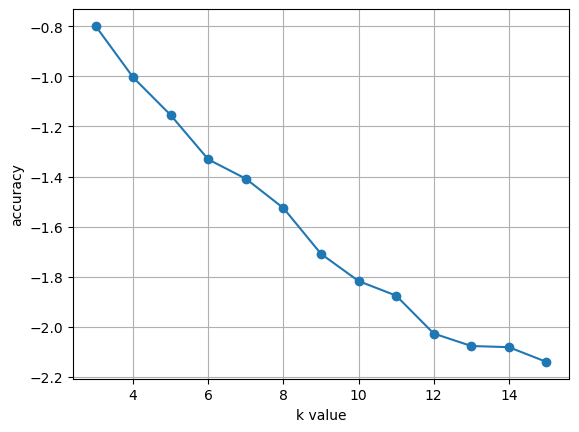

In [93]:
plt.plot(neighbors,metric_k,'-o')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [94]:
knn=KNeighborsRegressor(n_neighbors=15)
model_knn=knn.fit(xtrain,ytrain)
knn_pred=model_knn.predict(xtest)
knn_pred

array([77.01333333, 69.77333333, 64.97333333, 64.66666667, 70.92666667,
       57.64      , 77.86      , 73.22666667, 74.19333333, 61.71333333,
       67.92      , 73.22      , 66.92      , 77.27333333, 73.84      ,
       73.00666667, 71.4       , 75.84      , 66.96666667, 73.44666667,
       66.11333333, 73.54      , 73.57333333, 74.86      , 67.08666667,
       68.40666667, 65.36666667, 67.40666667, 65.68666667, 72.80666667,
       71.18666667, 65.43333333, 75.27333333, 73.75333333, 73.86666667,
       69.65333333, 56.69333333, 66.25333333, 69.10666667, 62.52666667,
       74.2       , 64.00666667, 65.15333333, 60.84666667, 59.52666667,
       57.52666667, 64.74666667, 76.87333333, 67.36      , 64.25333333,
       68.26      , 64.00666667, 59.08666667, 79.18666667, 65.74666667,
       67.12      , 69.70666667, 72.70666667, 67.73333333, 66.04      ,
       65.58      , 68.03333333, 67.08666667, 70.21333333, 57.6       ,
       75.58      , 70.64666667, 77.22666667, 66.40666667, 64.18

In [95]:
print(r2_score(knn_pred,ytest))
print(mean_squared_error(knn_pred,ytest))

-2.1410561999949946
76.25209341130605


# r2_scores of regression algorithms

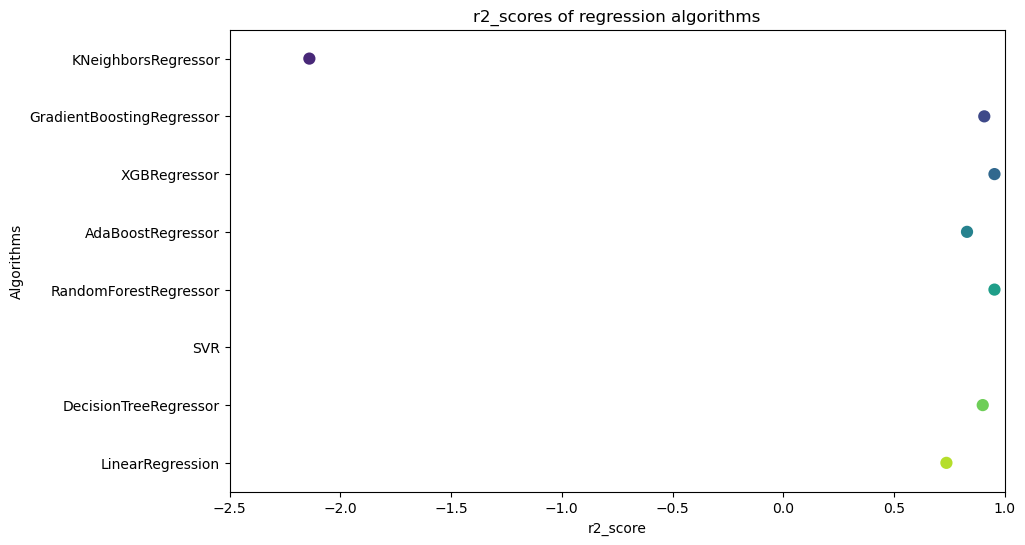

In [106]:
algorithms = ['KNeighborsRegressor', 'GradientBoostingRegressor', 'XGBRegressor', 'AdaBoostRegressor', 'RandomForestRegressor', 'SVR', 'DecisionTreeRegressor', 'LinearRegression']
r2_scores = [-2.14, .908, .954, .83, .954, -139.7, .901, .737]

plt.figure(figsize=(10, 6))
sns.pointplot(x=r2_scores, y=algorithms, join=False, markers='o', palette='viridis')
plt.title('r2_scores of regression algorithms')
plt.xlabel('r2_score')
plt.ylabel('Algorithms')
plt.xlim(-2.5, 1.0)
plt.show()


# CONCLUSION

After analyzing the R-squared scores of different regression algorithms, it is evident that XGBRegressor and RandomForestRegressor exhibit the highest R-squared scores. XGBRegressor achieved an R-squared score of 0.954, while RandomForestRegressor closely follows with an R-squared score of 0.954 as well. These two algorithms outperform the others in terms of predictive performance, indicating their suitability for the given regression task